In [1]:
from scipy.io import arff
import pysubgroup as ps
import pandas as pd

data = pd.DataFrame (arff.loadarff("/Users/lemmerich/Documents/data/data/credit-g.arff") [0])

target = ps.NominalTarget('class', b'bad')
searchSpace = ps.createSelectors(data, ignore=['class'])
task = ps.SubgroupDiscoveryTask (data, target, searchSpace, resultSetSize=10, depth=5, qf=ps.StandardQF(1))


In [2]:
%time result = ps.BeamSearch().execute(task)
for (q, sg) in result:
    print (str(q) + ":\t" + str(sg.subgroupDescription))  

CPU times: user 4.78 s, sys: 27.9 ms, total: 4.81 s
Wall time: 5 s
0.0553:	checking_status=b"'<0'" AND foreign_worker=b'yes'
0.0528:	checking_status=b"'<0'"
0.0523:	checking_status=b"'<0'" AND foreign_worker=b'yes' AND other_parties=b'none'
0.0506:	checking_status=b"'<0'" AND other_parties=b'none'
0.0496:	savings_status=b"'<100'" AND foreign_worker=b'yes' AND checking_status=b"'<0'"
0.0487:	checking_status=b"'<0'" AND foreign_worker=b'yes' AND num_dependents=1.0
0.0483:	checking_status=b"'<0'" AND savings_status=b"'<100'"
0.0474:	checking_status=b"'<0'" AND num_dependents=1.0
0.0466:	checking_status=b"'<0'" AND savings_status=b"'<100'" AND other_parties=b'none' AND foreign_worker=b'yes'
0.0455:	checking_status=b"'<0'" AND job=b'skilled' AND foreign_worker=b'yes'


In [3]:
%time result = ps.BSD().execute(task)
for (q, sg) in result:
    print (str(q) + ":\t" + str(sg.subgroupDescription))   

CPU times: user 4.2 s, sys: 14.8 ms, total: 4.21 s
Wall time: 4.38 s
0.0553:	checking_status=b"'<0'" AND foreign_worker=b'yes'
0.0528:	checking_status=b"'<0'"
0.0523:	checking_status=b"'<0'" AND other_parties=b'none' AND foreign_worker=b'yes'
0.0506:	checking_status=b"'<0'" AND other_parties=b'none'
0.0496:	checking_status=b"'<0'" AND savings_status=b"'<100'" AND foreign_worker=b'yes'
0.0487:	checking_status=b"'<0'" AND foreign_worker=b'yes' AND num_dependents=1.0
0.0483:	checking_status=b"'<0'" AND savings_status=b"'<100'"
0.0474:	checking_status=b"'<0'" AND num_dependents=1.0
0.0466:	checking_status=b"'<0'" AND savings_status=b"'<100'" AND other_parties=b'none' AND foreign_worker=b'yes'
0.0455:	checking_status=b"'<0'" AND job=b'skilled' AND foreign_worker=b'yes'


In [4]:
df = ps.as_df(data, result)
df_key = df[["subgroup","size_sg", "target_share_sg", "lift"]]
df_key

,subgroup,size_sg,target_share_sg,lift
0,"checking_status=b""'<0'"" AND foreign_worker=b'yes'",259.0,0.513514,1.711712
1,"checking_status=b""'<0'""",274.0,0.492701,1.642336
2,"checking_status=b""'<0'"" AND other_parties=b'no...",229.0,0.528384,1.761281
3,"checking_status=b""'<0'"" AND other_parties=b'none'",238.0,0.512605,1.708683
4,"checking_status=b""'<0'"" AND savings_status=b""'...",208.0,0.538462,1.794872
5,"checking_status=b""'<0'"" AND foreign_worker=b'y...",211.0,0.530806,1.769352
6,"checking_status=b""'<0'"" AND savings_status=b""'...",219.0,0.520548,1.735160
7,"checking_status=b""'<0'"" AND num_dependents=1.0",222.0,0.513514,1.711712
8,"checking_status=b""'<0'"" AND savings_status=b""'...",178.0,0.561798,1.872659
9,"checking_status=b""'<0'"" AND job=b'skilled' AND...",165.0,0.575758,1.919192


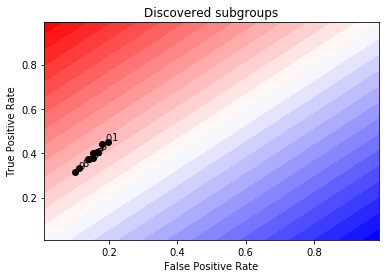

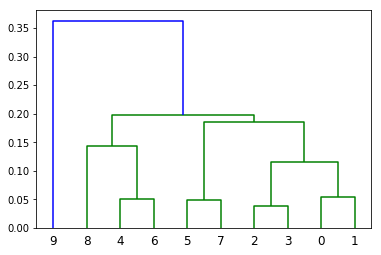

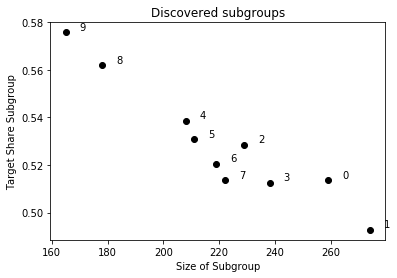

In [5]:
fig = ps.plot_roc(df, data, ps.StandardQF(1), annotate=True)

fig = ps.similarity_sgs(result, data)

fig = ps.similarity_dendrogram(result, data)

fig = ps.plot_npspace(df, data, fixed_limits=False)
